In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
data = pd.read_csv('Practice/data/advertising.csv')
data = data.sort_values('Sales')

In [12]:
xTrain = data.values[:,:-1]
yTrain = data.values[:,-1]

In [13]:
def predict(x,w,b):
    return np.dot(x,w)+b

In [14]:
def gradientDescent(x,y,learningRate,iterations):
    m,n = x.shape
    w,b = np.zeros(n),0
    costList = np.array([])
    for i in range(iterations):
        cost = (1/(2*m))*np.sum(np.square(predict(x,w,b)-y))
        costList = np.append(costList,cost)
        dw = (1/m)*np.dot(x.T,predict(x,w,b)-y)
        db = (1/m)*(predict(x,w,b)-y)
        w = w - learningRate*dw
        b = b - learningRate*db
        if(i%(iterations/100)==0):
            print(f'Iteration : {i}\tCost : {cost}')
    return w,b,costList

In [52]:
def plotSales(x,y):
    w,b,costList = gradientDescent(x,y,learningRate=3e-7,iterations=100000)
    m = range(y.size)
    fig,axes = plt.subplots(1,3,figsize=(12,3))
    fig.tight_layout()
    axes[0].scatter(m,y,label='Original Sales')
    axes[0].scatter(m,predict(x,w,b),label='Predicted Sales')
    axes[0].legend()
    axes[0].set_ylabel('Sales')
    axes[0].set_title('Sales')
    axes[1].bar(m,predict(x,w,b)-y)
    axes[1].set_title('Difference')
    axes[2].plot(range(len(costList)),costList)
    axes[2].set_ylabel('Cost')
    axes[2].set_title('Cost Function')

Iteration : 0	Cost : 128.355975
Iteration : 1000	Cost : 6.056181587809499
Iteration : 2000	Cost : 5.219380986672018
Iteration : 3000	Cost : 4.661784782940048
Iteration : 4000	Cost : 4.281635979037909
Iteration : 5000	Cost : 4.015311680944818
Iteration : 6000	Cost : 3.8229145657169346
Iteration : 7000	Cost : 3.6793217394971807
Iteration : 8000	Cost : 3.568621970555148
Iteration : 9000	Cost : 3.48065743975256
Iteration : 10000	Cost : 3.4088727362458213
Iteration : 11000	Cost : 3.3489759804493144
Iteration : 12000	Cost : 3.298104586035864
Iteration : 13000	Cost : 3.2543046871972092
Iteration : 14000	Cost : 3.216205611805585
Iteration : 15000	Cost : 3.182815713629692
Iteration : 16000	Cost : 3.1533937810655877
Iteration : 17000	Cost : 3.127367570028046
Iteration : 18000	Cost : 3.1042817724557956
Iteration : 19000	Cost : 3.0837644179842547
Iteration : 20000	Cost : 3.065504860118342
Iteration : 21000	Cost : 3.0492390793394466
Iteration : 22000	Cost : 3.03473963992589
Iteration : 23000	Cost :

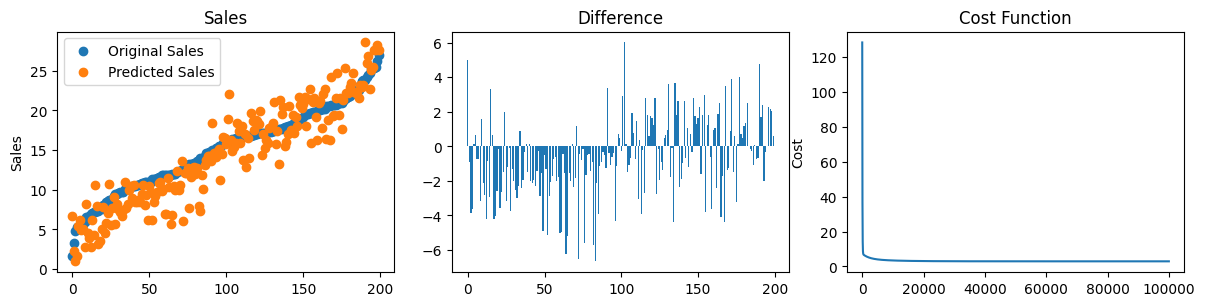

In [53]:
plotSales(xTrain,yTrain)